# Comparing RGB and RC backgrounds
This notebook allow to compares the PSDs as well as the fitted apollinaire backgrounds 


In [1]:
import apollinaire as apn
from apollinaire.peakbagging import *
from apollinaire.psd import series_to_psd
import pandas as pd
import numpy as np
from astropy.io import fits
import astropy.io as io
import matplotlib.pyplot as plt
import glob
import os

In [2]:
#hdul = fits.open(r'/Users/amber3/Desktop/SSI/power_spectrum.fits')
#data=hdul.data

### Defining the needed routines

In [3]:
def plot_figure(freq,psd,back,back_H1,back_H2,pnoise,kic=''):
    %matplotlib widget
    fnt_sz = 12.0
    alpha_val = 0.5
    fig, ax = plt.subplots (figsize=(8,6))

    #psd_smooth = smooth (psd, 11)
    psd_smooth = psd

    #ax.plot (freq, psd_norm, color='darkgrey', lw=2)
    ax.plot (freq, psd_smooth, color='gray', lw=1,alpha=alpha_val*1.2)
    ax.plot (freq, back, color='Red', lw=3)
    ax.plot (freq, back_H1, color='navy', lw=2,linestyle='dashed',alpha=alpha_val)
    ax.plot (freq, back_H2, color='blue', lw=2,linestyle='dashed',alpha=alpha_val)
    ax.plot ([10**-1,280],[pnoise,pnoise], color='dodgerblue', lw=2,linestyle='dashed',alpha=alpha_val)

    ax.set_xlabel ('Frequency ($\mu$Hz)',fontsize = fnt_sz)
    ax.set_ylabel ('PSD (SNR)',fontsize = fnt_sz) # ppm$^2$/$\mu$Hz
    ax.tick_params(axis='both', which='major', labelsize=fnt_sz)
    ax.set_title (kic)

    ax.set_xscale ('log')
    ax.set_yscale ('log')

    ax.set_xlim (.1, 300)#92, 140
    ax.set_ylim (1,1000000)
    #fig.savefig ('Back_results.png',format='png',facecolor='white', transparent=False, dpi=300)
    return fig;

In [4]:
def plot_figure_two(freq_rc, psd_rc,back_rc,back_H1_rc,back_H2_rc,pnoise_rc,kic_rc,
                    freq_rgb,psd_rgb,back_rgb,back_H1_rgb,back_H2_rgb,pnoise_rgb,kic_rgb,ylim_min=1,fig_name=''):

    %matplotlib widget
    fnt_sz = 12.0
    alpha_val = 0.4
    alpha_val1 = 0.6

    fig, ax = plt.subplots (figsize=(8,6))

    # FOR RC star
    #psd_smooth_rc = smooth (psd_rc, 11)
    psd_smooth_rc = psd_rc
    ax.plot (freq_rc, psd_smooth_rc, color='skyblue', lw=1,alpha=alpha_val1)
    ax.plot (freq_rc, back_rc, color='darkblue', lw=3)
    ax.plot (freq_rc, back_H1_rc, color='navy', lw=2,linestyle='dashed',alpha=alpha_val)
    ax.plot (freq_rc, back_H2_rc, color='blue', lw=2,linestyle='dashed',alpha=alpha_val)
    ax.plot ([10**-1,280],[pnoise_rc,pnoise_rc], color='dodgerblue', lw=2,linestyle='dashed',alpha=alpha_val)

    # FOR RGB star
    #psd_smooth_rgb = smooth (psd_rgb, 11)
    psd_smooth_rgb = psd_rgb
    ax.plot (freq_rgb, psd_smooth_rgb, color='coral', lw=1,alpha=alpha_val1)
    ax.plot (freq_rgb, back_rgb, color='Red', lw=3)
    ax.plot (freq_rgb, back_H1_rgb, color='darkred', lw=2,linestyle='-.',alpha=alpha_val)
    ax.plot (freq_rgb, back_H2_rgb, color='salmon', lw=2,linestyle='-.',alpha=alpha_val)
    ax.plot ([10**-1,280],[pnoise_rgb,pnoise_rgb], color='peachpuff', lw=2,linestyle='-.',alpha=alpha_val)

    #--------
    
    ax.set_xlabel ('Frequency ($\mu$Hz)',fontsize = fnt_sz)
    ax.set_ylabel ('PSD (SNR)',fontsize = fnt_sz) # ppm$^2$/$\mu$Hz
    ax.tick_params(axis='both', which='major', labelsize=fnt_sz)
    #ax.set_title ('KIC ' + kic_rc + ' KIC ' + kic_rgb)
    
    ax.text(30, 4.e5, ' RC KIC ' + kic_rc , fontsize=fnt_sz,color='skyblue')
    ax.text(30, 2.e5, 'RGB KIC ' + kic_rgb , fontsize=fnt_sz,color='coral')

    ax.set_xscale ('log')
    ax.set_yscale ('log')

    ax.set_xlim (.1, 300)#92, 140
    ax.set_ylim (ylim_min,1000000)
    if fig_name !='':
        fig.savefig (fig_name,format='png',facecolor='white', transparent=False, dpi=250)
    return ;

In [5]:
# Read the background parameters providing a KIC
def read_background_and_psd(kic):
    #Looking for the directory
    #path_apo_fits='/Volumes/HDD_Black/DATA/KEPLER_LC/4Josefina/'
    #file_mask=path_apo_fits+'/FIT*/*'+kic
    #path_star=(glob.glob(file_mask))[0]
    path_star = '/Users/amber3/Desktop/SSI/texts/Kepler_data/'
    #path_back = path_star+'/Back*/background*_param.dat'
    #file_back_param=(glob.glob(path_back))[0]
    
    #Read PSD file
    psd_file_in = path_star + 'hlsp_kepseismic_kepler_phot_kplr'+kic+'-20d_kepler_v1_cor-psd-filt-inp.fits'
    #hlsp_kepseismic_kepler_phot_kplr011033153-20d_kepler_v1_cor-psd-filt-inp.fits”
    data = io.fits.getdata(psd_file_in, ext=1) #'PSD_'+EPIC+'.fits', ext=0)
    print(np.shape(data))
    plt.plot(data.TIME, data.FLUX)
    plt.show()
    #freq = data[:,0]*1.e6
    freq = data.TIME*1.e6
    #psd = data[:,1]
    psd = data.FLUX
    
    #Read background parameters & computes background components
    #back_param = np.loadtxt(file_back_param)
    hdul_b = fits.open(r"/Users/amber3/Desktop/SSI/Selected_stars_final.fits")
    hdu_b = hdul_b[0]
    B_data = hdu_b.data
    KIC_B = np.array(B_data[:,0,0])
    ikic = np.where(KIC_B == int(kic))
    
    #back_param_val = back_param[:,0].copy()
    back_param_val = np.reshape(B_data[ikic, 0, 6:18], 12)
    low_cut    = 1
    apo_flag   = True
    gauss_flag = True
    back = apn.peakbagging.build_background (freq, back_param_val, n_harvey=2,apodisation=apo_flag, remove_gaussian=gauss_flag)
    
    back_param_H1 = np.append(back_param_val[0:3],back_param_val[6:])
    back_param_H2 = back_param_val[3:].copy()
    back_H1 = apn.peakbagging.build_background (freq, back_param_H1, n_harvey=1,apodisation=apo_flag, remove_gaussian=gauss_flag)
    back_H2 = apn.peakbagging.build_background (freq, back_param_H2, n_harvey=1,apodisation=apo_flag, remove_gaussian=gauss_flag)
    pnoise=back_param_val[11]
    #plot_figure(freq,psd,back,back_H1,back_H2,pnoise)
    
    return freq,psd,back,back_H1,back_H2,pnoise ;
    

## Starting the core of the program: Defining global variables

In [6]:
#Defining variables:
path_in        = '/Users/amber3/Desktop/SSI/texts/comp_background'
path_out_figs  = '/Users/amber3/Desktop/SSI/texts/comp_background/FIGS_COMP_1/'
path_out_figs_norm = '/Users/amber3/Desktop/SSI/texts/comp_background/FIGS_COMP_NORM_1'
path_out_figs_subs = '/Users/amber3/Desktop/SSI/texts/comp_background/FIGS_COMP_SUBS_1/'


# Check whether the specified path_in exists or not
isExist = os.path.exists(path_in)
if not isExist:
    print('The Input directory does not exist,\n write the proper one in the program')

# Check whether the specified path_out_figs exists or not
isExist = os.path.exists(path_out_figs)
if not isExist:
  # Create a new directory because it does not exist 
  os.makedirs(path_out_figs)
  print("The new directory is created!")

# Check whether the specified path_out_figs exists or not
isExist = os.path.exists(path_out_figs_norm)
if not isExist:
  # Create a new directory because it does not exist 
  os.makedirs(path_out_figs_norm)
  print("The new directory is created!")

# Check whether the specified path_out_figs exists or not
isExist = os.path.exists(path_out_figs_subs)
if not isExist:
  # Create a new directory because it does not exist 
  os.makedirs(path_out_figs_subs)
  print("The new directory is created!")    

In [7]:
#Read CSV file with KICS of RC & RGB into a dataframe
csv = '/Users/amber3/Desktop/10_matched_pairs.csv'
df = pd.read_csv(csv)
# Check the data no NaNs, all good and proper Dtype (no object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   KIC_RGB  10 non-null     int64  
 1   KIC_RC   10 non-null     int64  
 2   A1_F1    10 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 368.0 bytes


In [8]:
df
print(str(df.KIC_RC[0]))

10527889


(30607,)


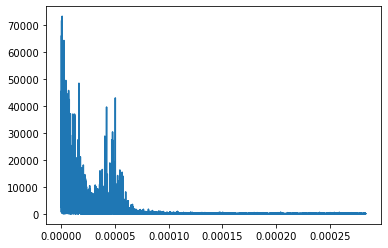

(33048,)


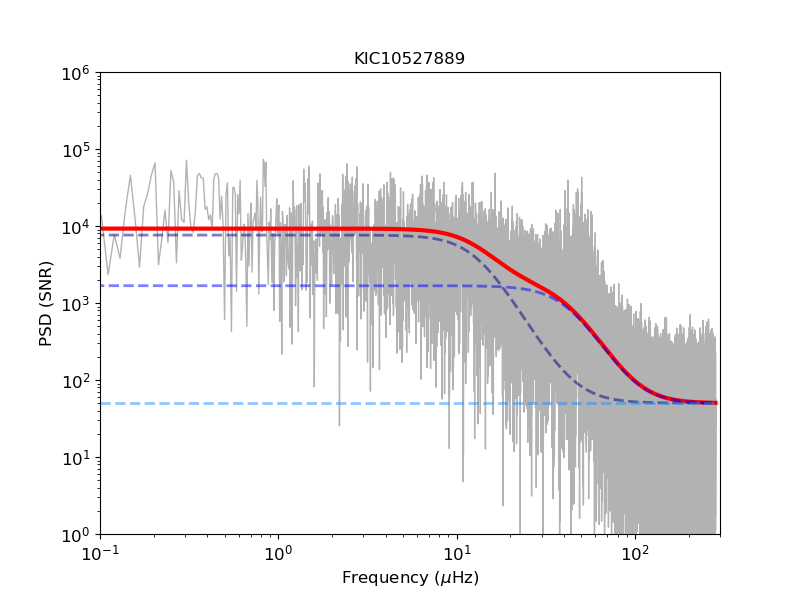

Loop  0 
 /Users/amber3/Desktop/SSI/texts/comp_background/FIGS_COMP_1/comp_10527889_3449907.png
(35174,)


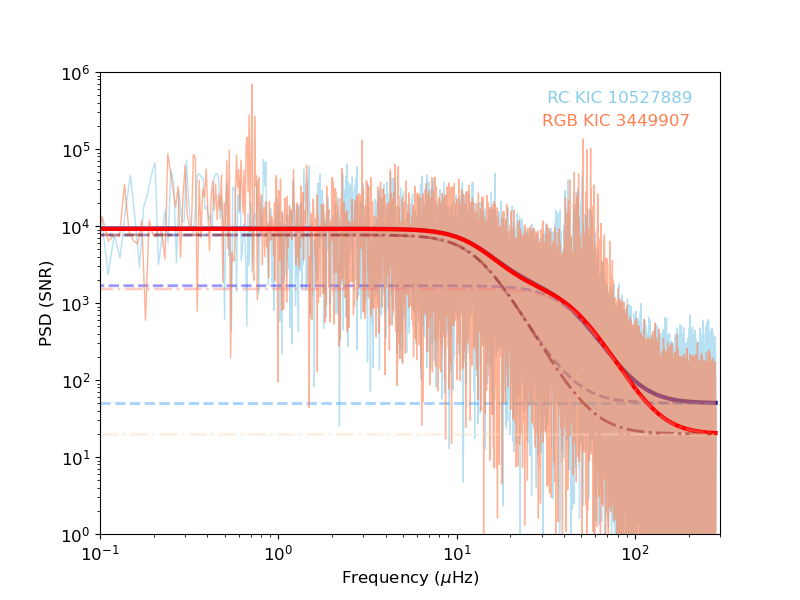

(33048,)


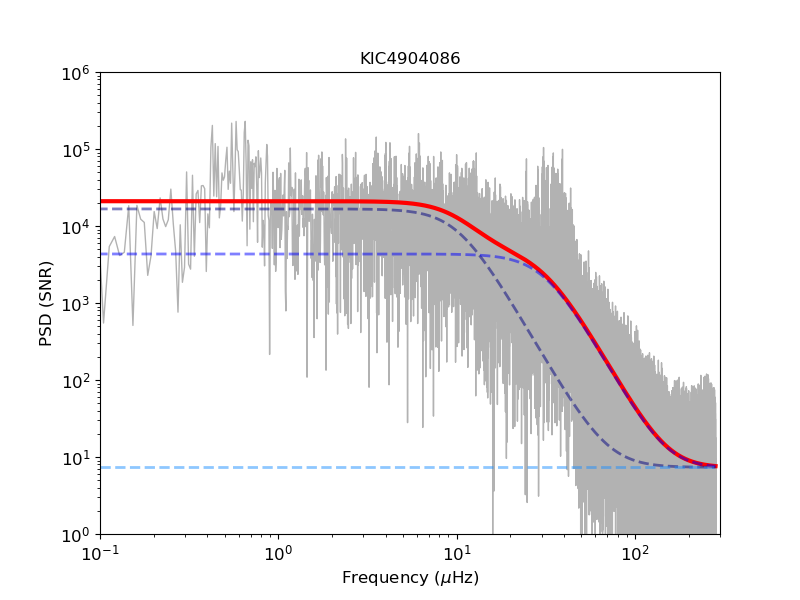

Loop  1 
 /Users/amber3/Desktop/SSI/texts/comp_background/FIGS_COMP_1/comp_4904086_7204851.png
(35982,)


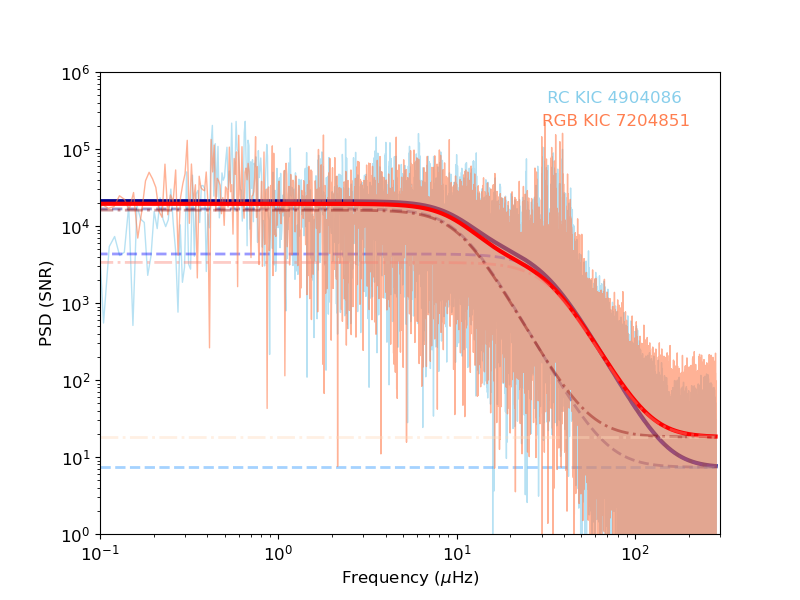

(35981,)


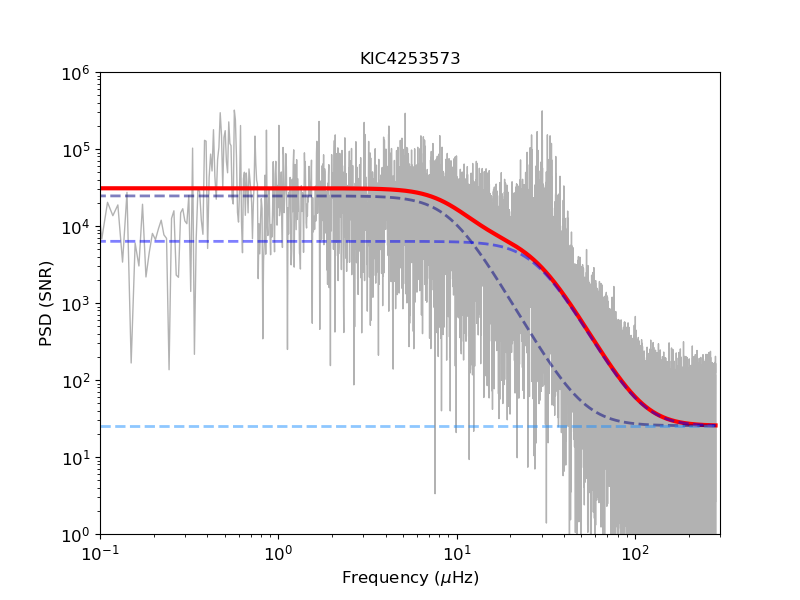

Loop  2 
 /Users/amber3/Desktop/SSI/texts/comp_background/FIGS_COMP_1/comp_4253573_8506868.png
(33049,)


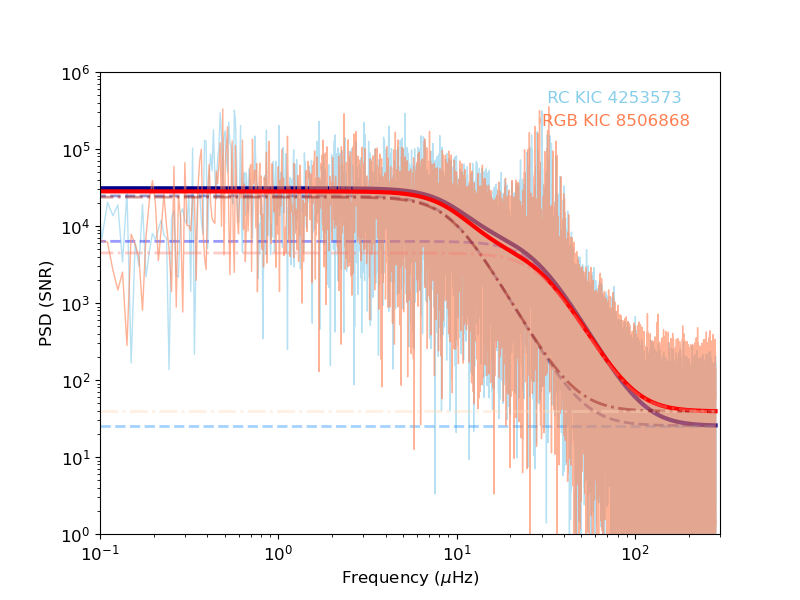

(35981,)


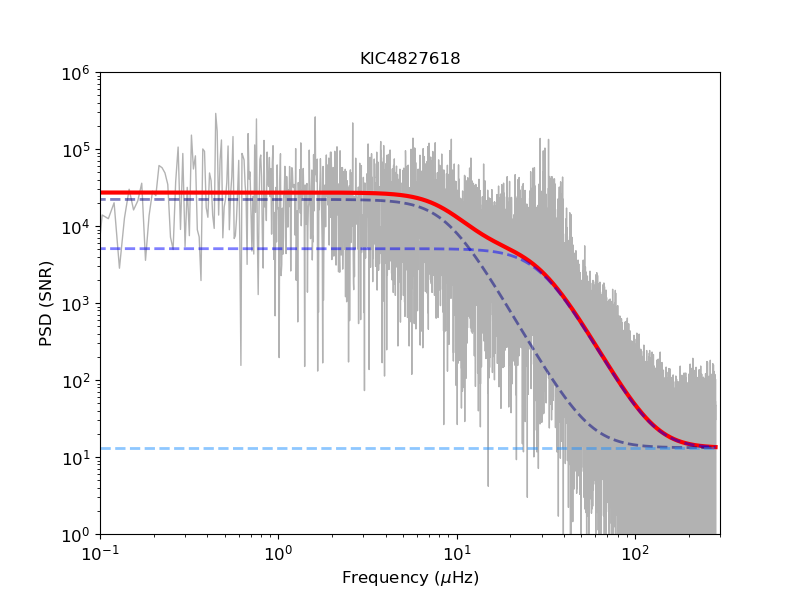

Loop  3 
 /Users/amber3/Desktop/SSI/texts/comp_background/FIGS_COMP_1/comp_4827618_7093179.png
(33048,)


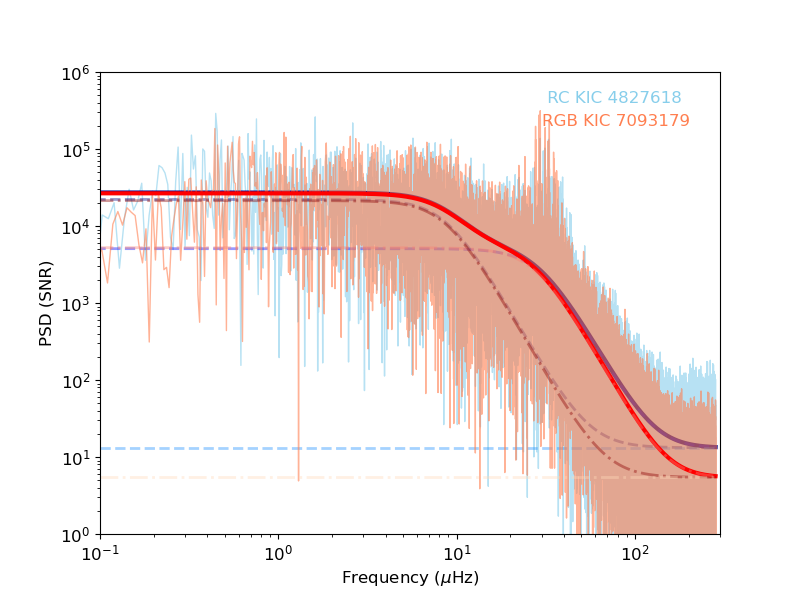

(35982,)


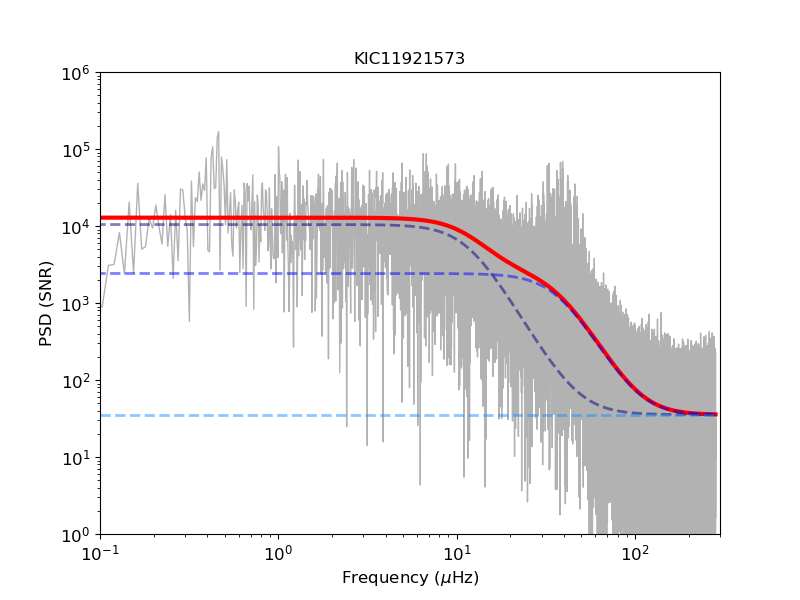

Loop  4 
 /Users/amber3/Desktop/SSI/texts/comp_background/FIGS_COMP_1/comp_11921573_9637054.png
(33048,)


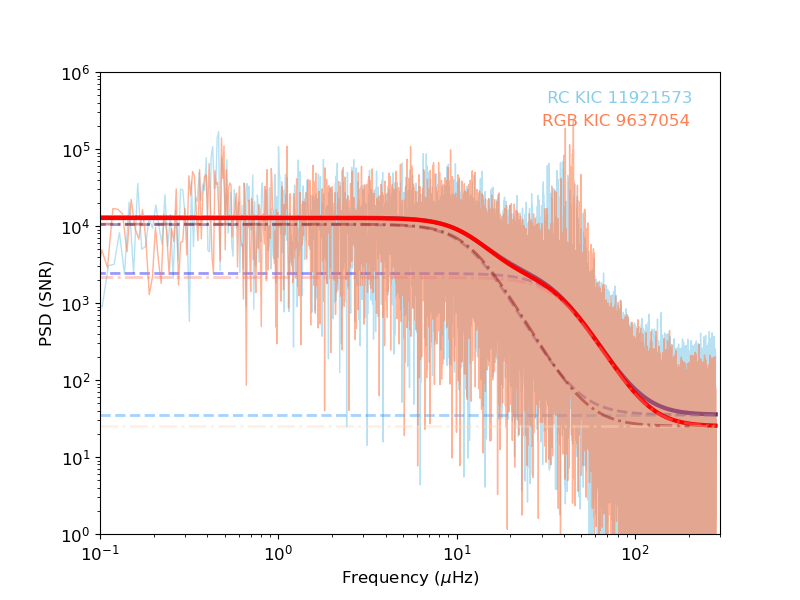

(35982,)


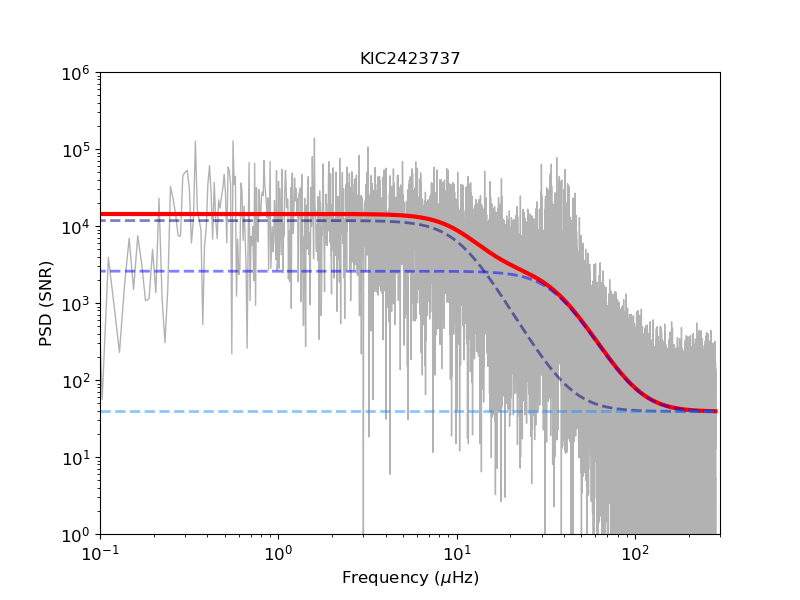

Loop  5 
 /Users/amber3/Desktop/SSI/texts/comp_background/FIGS_COMP_1/comp_2423737_11810798.png
(33049,)


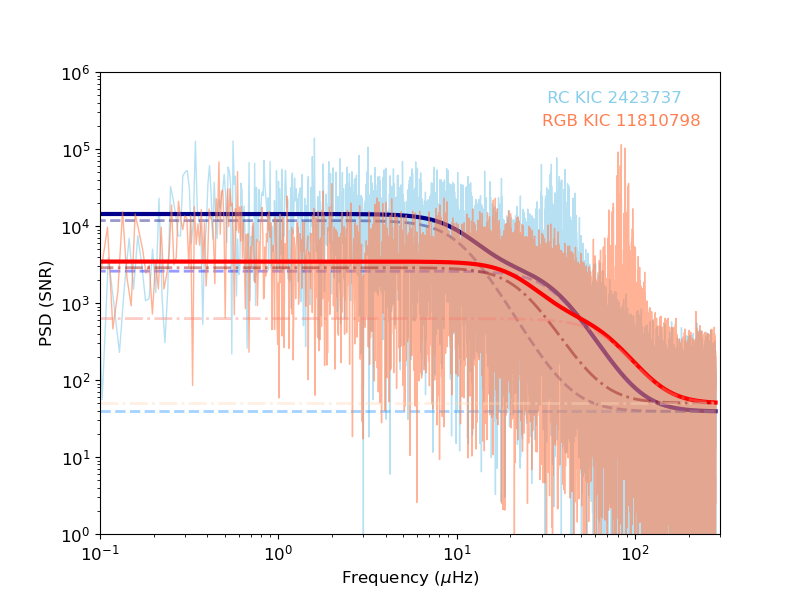

(35982,)


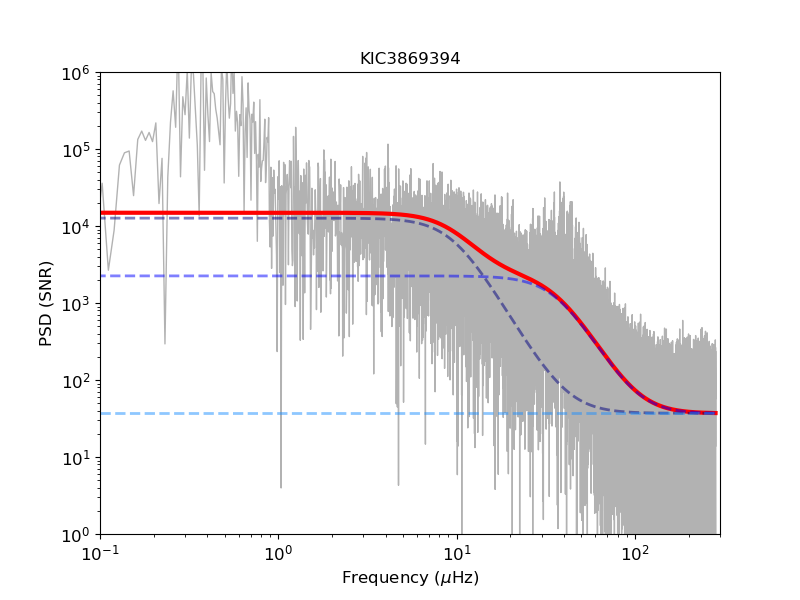

Loop  6 
 /Users/amber3/Desktop/SSI/texts/comp_background/FIGS_COMP_1/comp_3869394_10858675.png
(35982,)


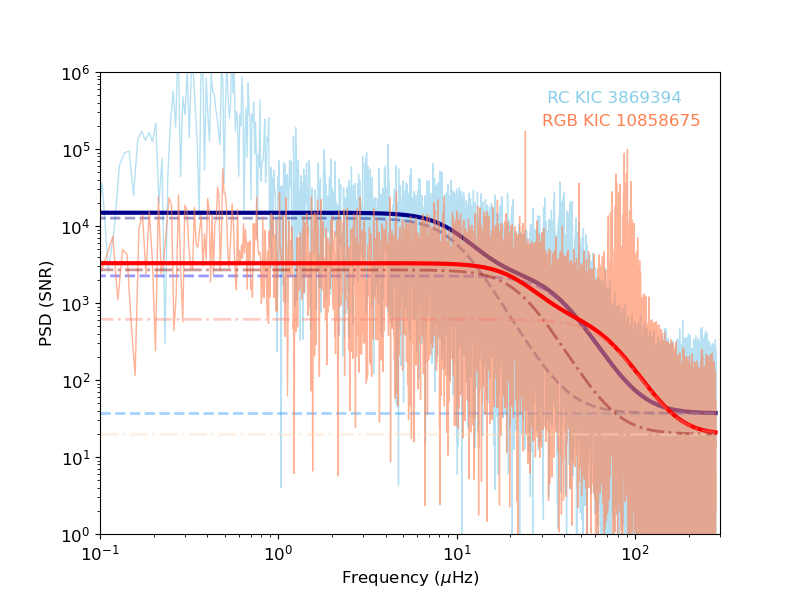

(35982,)


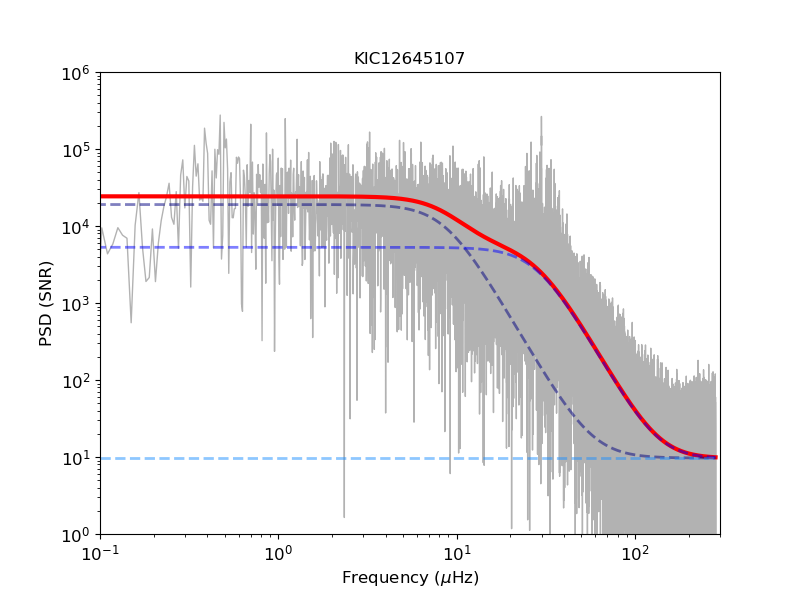

Loop  7 
 /Users/amber3/Desktop/SSI/texts/comp_background/FIGS_COMP_1/comp_12645107_8349297.png
(30607,)


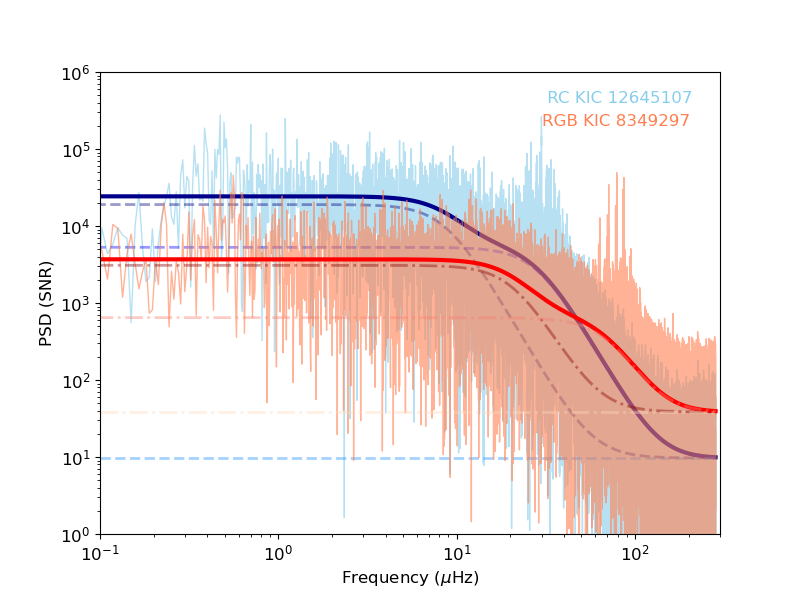

(34904,)


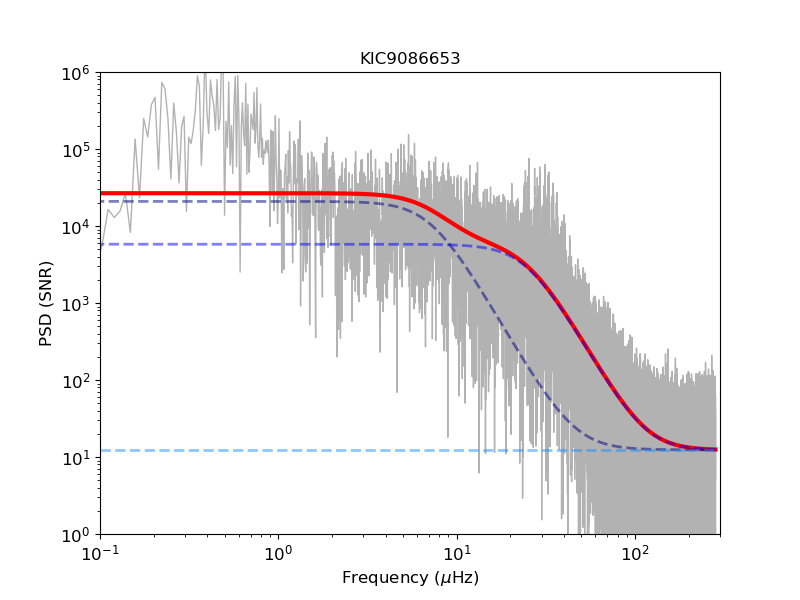

Loop  8 
 /Users/amber3/Desktop/SSI/texts/comp_background/FIGS_COMP_1/comp_9086653_12156874.png
(35982,)


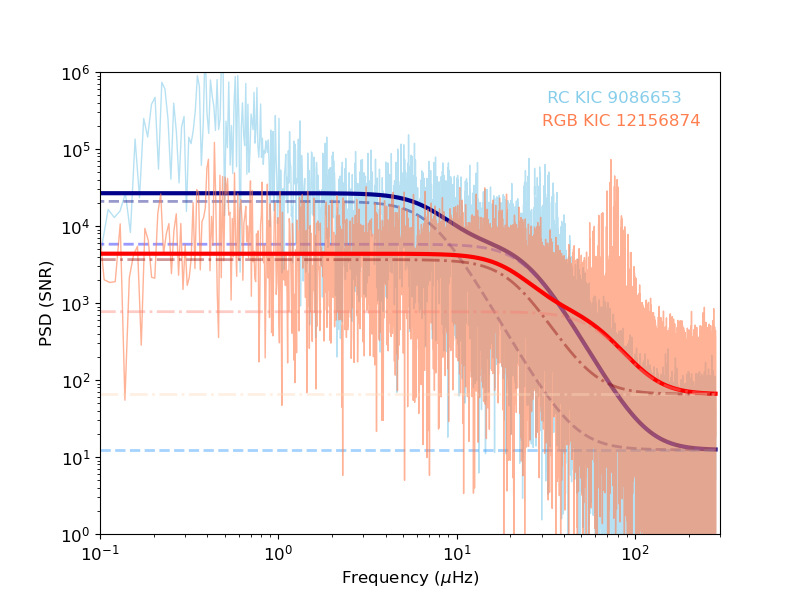

(30606,)


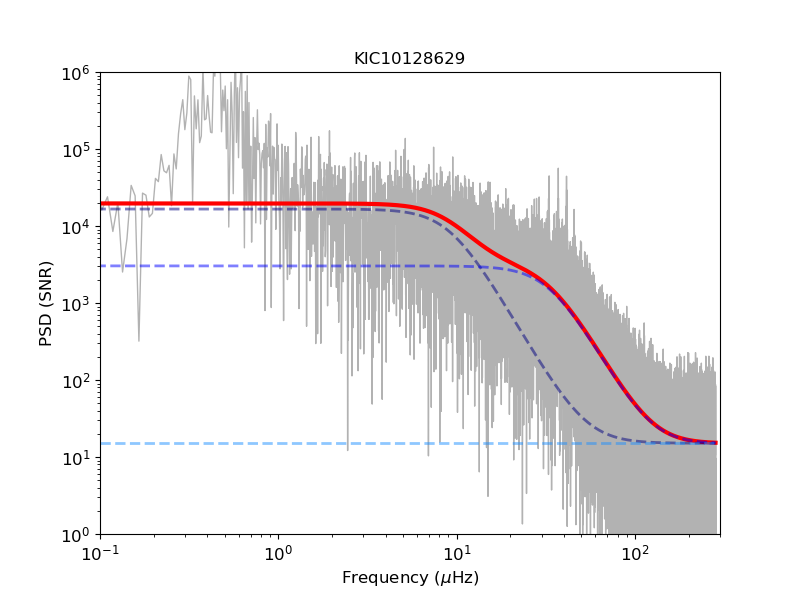

Loop  9 
 /Users/amber3/Desktop/SSI/texts/comp_background/FIGS_COMP_1/comp_10128629_10096476.png


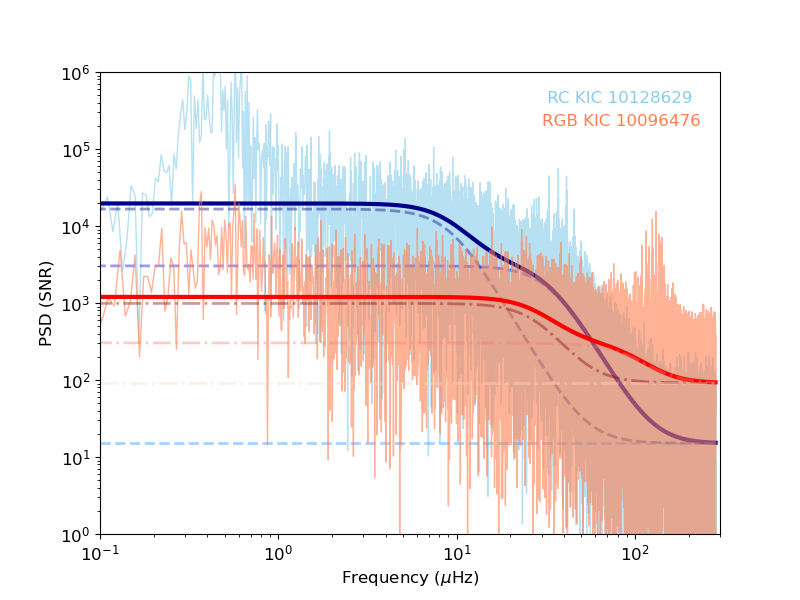

In [9]:
n_rows = df['KIC_RC'].size #10 rows
#n_rows = 1
#print(n_rows)

for i in range(n_rows):    
    #Read files and plot for RC 
    kic_name_rc = str(df.KIC_RC[i])
    #kic_name_rc = '007841977'
    freq_rc, psd_rc, back_rc, back_H1_rc, back_H2_rc, pnoise_rc = read_background_and_psd(kic=kic_name_rc)
    plot_figure(freq_rc, psd_rc, back_rc, back_H1_rc, back_H2_rc, pnoise_rc, kic = 'KIC'+kic_name_rc)

    #Read files and plot for RGB 
    kic_name_rgb = str(df.KIC_RGB[i])
    #kic_name_rgb = '007457184'
    freq_rgb, psd_rgb, back_rgb, back_H1_rgb, back_H2_rgb, pnoise_rgb = read_background_and_psd(kic=kic_name_rgb)
    plot_figure(freq_rgb, psd_rgb, back_rgb, back_H1_rgb, back_H2_rgb, pnoise_rgb, kic = 'KIC'+kic_name_rgb)

    #plotting the figures
    file_out_name = path_out_figs+'comp_' + kic_name_rc+'_' + kic_name_rgb + '.png'
    print('Loop ',i,'\n',file_out_name)
    plot_figure_two(freq_rc,psd_rc,back_rc,back_H1_rc,back_H2_rc,pnoise_rc,kic_name_rc,
                freq_rgb,psd_rgb,back_rgb,back_H1_rgb,back_H2_rgb,pnoise_rgb,kic_name_rgb,fig_name=file_out_name)

## Normalizing the two PSDs by dividing by the photon noise


In [117]:
n_rows = df['KIC_RC'].size

for i in range(n_rows):    
    #Read files and plot for RC 
    kic_name_rc = str(df.KIC_RC[i])
    freq_rc, psd_rc, back_rc, back_H1_rc, back_H2_rc, pnoise_rc = read_background_and_psd(kic=kic_name_rc)
    psd_rc     = psd_rc / pnoise_rc
    back_rc    = back_rc / pnoise_rc
    back_H1_rc = back_H1_rc / pnoise_rc
    back_H2_rc = back_H2_rc / pnoise_rc
    pnoise_rc = 1
    plot_figure(freq_rc, psd_rc, back_rc, back_H1_rc, back_H2_rc, pnoise_rc, kic = 'KIC'+kic_name_rc)

    #Read files and plot for RGB 
    kic_name_rgb = str(df.KIC_RGB[i])
    freq_rgb, psd_rgb, back_rgb, back_H1_rgb, back_H2_rgb, pnoise_rgb = read_background_and_psd(kic=kic_name_rgb)
    psd_rgb     = psd_rgb / pnoise_rgb
    back_rgb    = back_rgb / pnoise_rgb
    back_H1_rgb = back_H1_rgb / pnoise_rgb
    back_H2_rgb = back_H2_rgb / pnoise_rgb
    pnoise_rgb = 1
    plot_figure(freq_rgb, psd_rgb, back_rgb, back_H1_rgb, back_H2_rgb, pnoise_rgb, kic = 'KIC'+kic_name_rgb)

    #plotting the figures
    file_out_name = path_out_figs_norm+'comp_' + kic_name_rc+'_' + kic_name_rgb + '.png'
    print('Loop ',i,'\n',file_out_name)
    plot_figure_two(freq_rc,psd_rc,back_rc,back_H1_rc,back_H2_rc,pnoise_rc,kic_name_rc,
                freq_rgb,psd_rgb,back_rgb,back_H1_rgb,back_H2_rgb,pnoise_rgb,kic_name_rgb,ylim_min=1e-2,fig_name=file_out_name)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/amber3/Desktop/SSI/texts/Kepler_data/hlsp_kepseismic_kepler_phot_kplr8175438-20d_kepler_v1_cor-psd-filt-inp.fits'

In [64]:
## Normalizing the two PSDs by substracting the photon noise

In [65]:
n_rows = df['KIC_RC'].size

for i in range(n_rows):    
    #Read files and plot for RC 
    kic_name_rc = str(df.KIC_RC[i])
    freq_rc, psd_rc, back_rc, back_H1_rc, back_H2_rc, pnoise_rc = read_background_and_psd(kic=kic_name_rc)
    psd_rc     = psd_rc - pnoise_rc + 1
    back_rc    = back_rc - pnoise_rc + 1
    back_H1_rc = back_H1_rc - pnoise_rc + 1
    back_H2_rc = back_H2_rc - pnoise_rc + 1
    pnoise_rc = 1
    plot_figure(freq_rc, psd_rc, back_rc, back_H1_rc, back_H2_rc, pnoise_rc, kic = 'KIC'+kic_name_rc)

    #Read files and plot for RGB 
    kic_name_rgb = str(df.KIC_RGB[i])
    freq_rgb, psd_rgb, back_rgb, back_H1_rgb, back_H2_rgb, pnoise_rgb = read_background_and_psd(kic=kic_name_rgb)
    psd_rgb     = psd_rgb - pnoise_rgb + 1
    back_rgb    = back_rgb - pnoise_rgb + 1
    back_H1_rgb = back_H1_rgb - pnoise_rgb + 1
    back_H2_rgb = back_H2_rgb - pnoise_rgb + 1
    pnoise_rgb = 1
    plot_figure(freq_rgb, psd_rgb, back_rgb, back_H1_rgb, back_H2_rgb, pnoise_rgb, kic = 'KIC'+kic_name_rgb)

    #plotting the figures
    file_out_name = path_out_figs_subs + 'comp_' + kic_name_rc+'_' + kic_name_rgb + '.png'
    print('Loop ',i,'\n',file_out_name)
    plot_figure_two(freq_rc,psd_rc,back_rc,back_H1_rc,back_H2_rc,pnoise_rc,kic_name_rc,
                freq_rgb,psd_rgb,back_rgb,back_H1_rgb,back_H2_rgb,pnoise_rgb,kic_name_rgb,ylim_min=1e-1,fig_name=file_out_name)

IndexError: list index out of range